# COMP3221 - Distributed Systems

## Tutorial 05 - Distributed Optimization

**Objectives:**

* To understand the basics of gradient descent and distributed gradient descent with Linear Regression.

**Instructions:**
* Exercises tend to be completed by **Python 3** programming language.
* You can either use IPython notebook or just python files to finish the exercises.
* To install IPython notebooks and Python 3, you can:
   * Use IPython 3 (Jupyter) notebook installed on your computer: http://jupyter.org/install (you need to have Python installed first: https://docs.python.org/3/using/index.html )
   * Use Web-based IPython notebooks such as Google Colaboratory: https://colab.research.google.com/   
* Using the IPython notebook:
  * If you are using Jupyter intalled on your computer, Go to *File -> Open*. Drag and drop the "*.ipynb*" file to the home interface and click upload.
  * If you are using Google Colaboratory, Click *File -> Upload notebook*, and upload the "*.ipynb*" file.
  * To run the code cells you can press *Ctrl-Enter* or hit the *Play* button at the top.
* Using python files:
  * We recommend using Visual Studio Code as IDE: https://code.visualstudio.com/
  
* Please complete all exercises marked with **TODO**.

## 0. Setup

Install Sklearn and Matplotlib

In [ ]:
!pip install -U scikit-learn
!pip install -U matplotlib

Import some basic libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

np.random.seed(123)
%matplotlib inline

## 1. Linear Regression

Linear regression can be used to make predictions about a continuous target variable, using a set of predictor variables. We'll refer to those predictions as $y$, where:
$$y = \underbrace{X}_{m\times n}\cdot \underbrace{w}_{n\times 1}$$




and $X$ is a matrix of $m$ observations, each observation composed of $n$ predictor variables. Additionally, $w$ is a vector of $n$ _weights_ (aka coefficients).

In machine learning, gradient descent iteratively updates the weights to minimize some loss function. The loss function's job is to tell us how wrong our weights are at any given step of the algorithm. For linear regression, our loss function is the mean squared error (MSE):
 $$MSE = \frac{1}{2N} ||y - Xw||^2 $$

### 1.1 Generate a linear synthetic data

Since we focus on the Linear Regression algorithm, we'll  generate a dataset $(X,y)$ that is amenable to a linear function.

In [3]:
X = np.random.rand(5000)
y = 4 + 3 * X + .5*np.random.randn(5000)

# Split the data into training set and test set
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Add an extra columns of ones
one = np.ones((xTrain.shape[0],1))
xTrainbar = np.concatenate((one, xTrain.reshape(-1, 1)), axis = 1)

**Question**: Why do we need to add an extra columns of ones to xTrain?

*Answer*:  Adding the extra column of ones simplifies the mathematical operations in linear regression. It effectively transforms the linear equation into matrix-vector multiplication, making it more efficient to compute the parameters (coefficients) of the model using techniques like matrix inversion or gradient descent.

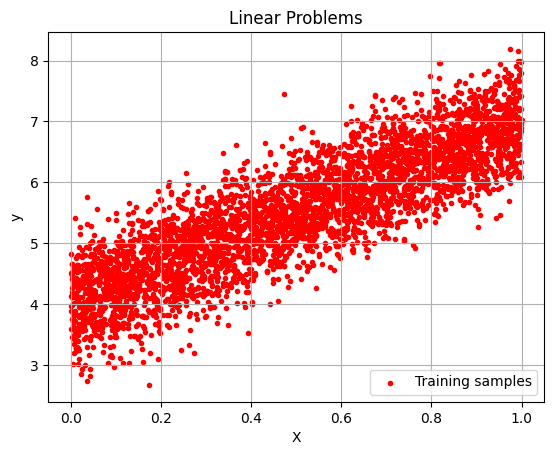

In [4]:
import matplotlib.pylab as pl
%matplotlib inline

# Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
pl.scatter(xTrainbar[:,1], yTrain,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('X')
pl.ylabel('y')
pl.legend(loc='lower right')
plt.title('Linear Problems')
pl.grid()
pl.show()

### 1.2. Solving Linear Regression model

#### 1.2.1 Closed-form solution:

With the Closed-form solution, we can obtain the optimal parameters for the Linear Regression algorithm by just using a formula that includes a few matrix multiplications and inversions.

* Closed-form solution: $w = (X^TX)^{-1}X^Ty$

**TASK: Finding the closed-form solution.**

In [5]:
# TODO: Finding closed-form solution using the above formula
A = np.dot(xTrainbar.T, xTrainbar)
b = np.dot(xTrainbar.T, yTrain)
wCF = np.dot(np.linalg.pinv(A), b)
print("Direct Solution:", wCF) # wCF is the weight obtained from closed-form solution

Direct Solution: [4.0137594  2.98708128]


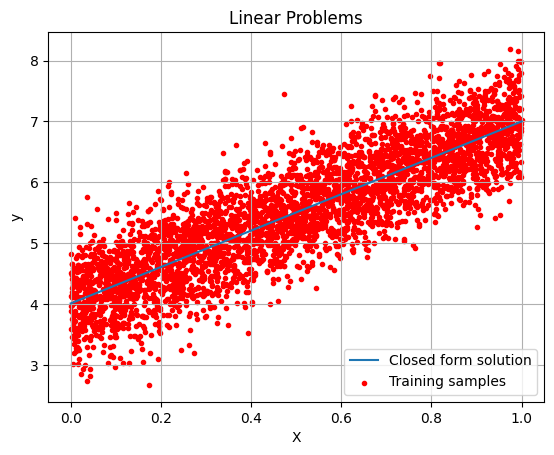

In [6]:
import matplotlib.pylab as pl
%matplotlib inline

w_0 = wCF[0]
w_1 = wCF[1]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0
plt.plot(x0, y0, label = 'Closed form solution')
# Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
pl.scatter(xTrainbar[:,1], yTrain,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('X')
pl.ylabel('y')
pl.legend(loc='lower right')
plt.title('Linear Problems')
pl.grid()
pl.show()

**Question**: What are the advantages and disadvantages of this method?


*Answer*:

Advantages:
- No need for iterations: Provides the exact coefficients in a single computation
- Interpretability: provides a direct relationship between the input features and the target variable through the regression coefficients.

Disadvantages:
- Computational Complexity: $O(n^3)$ for an n $\times$ n matrix
- Scalability Issues: does not scale well with the size of the dataset or the number of features, making it impractical for big data applications.

#### 1.2.2 Finding solution using Gradient Descent:

Gradient Descent is an iterative algorithm meaning that you need to take multiple steps to get to the global optimum (to find the optimal parameters).

Steps to do Gradient Descent:

1. Initialize $w =  w^{(0)}$ randomly:
2. Choose learning rate $ \eta> 0$
3.  Loop until convergence:

    Compute Gradient: $\nabla mse(w) = \frac{1}{N}X^T(Xw^t-y)$
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla mse(w)$

In our implementation, we will define a number of `iterations` which updates to `w`.

In [7]:
# get all sample for each interation
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)

        GradRmse = np.dot(x.T, error)
        w = w - (eta * (1/n) * GradRmse)
        past_w.append(w)

    return past_w, past_loss

[4.20758879 2.62202976]
0.1328133745739066


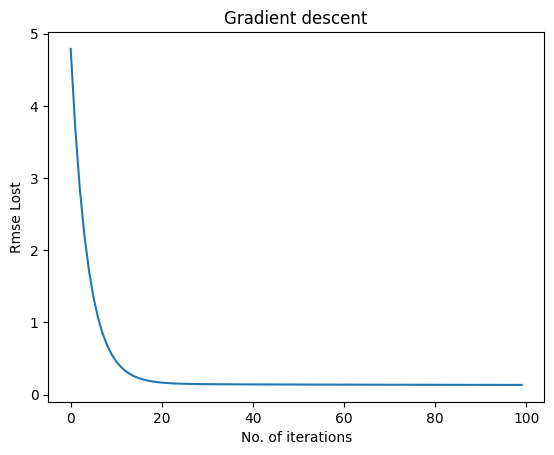

In [8]:
eta = 0.1 # Learning Rate
iterations = 100 # No. of iterations
w_init = np.array([2, 1])
(wGD, pastLoss) = gradient_descent(xTrainbar,yTrain, w_init, iterations, eta)
print(wGD[-1])
print(pastLoss[-1])
plt.title('Gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Rmse Lost')
plt.plot(pastLoss)
plt.show()

Let compare with solution from Sklean and the closed-form solution

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xTrain.reshape(-1, 1), yTrain.reshape(-1, 1))
wSK, b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b, wSK])
print(sol_sklearn)

[4.0137594  2.98708128]


The solutions from gradient descent, closed-form, sklearn are similar!

#### 1.2.3 Change of Learning Rate

Next, let's visualize the effect of learning rate on the behaviour of gradient descent in linear regression. Again, we use the plot-contour function to visualize the optimization landscape.

In [10]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

Let's track the steps of the gradient descent using different values for the learning rate.

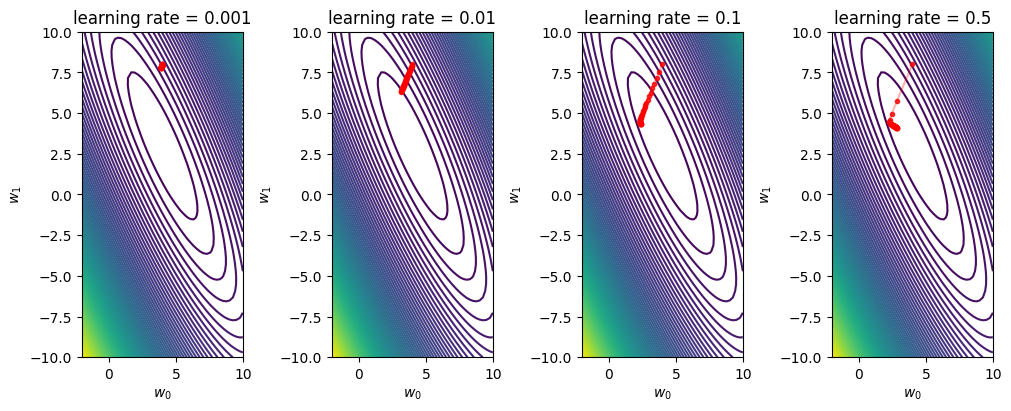

In [11]:
cost = lambda w: .5*np.mean((w[0] + w[1]*xTrainbar[:,1] - yTrain)**2)
learning_rates = [0.001, 0.01, 0.1, 0.5]
fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 4))
for i, lr in enumerate(learning_rates):
    w_init = np.array([8, 4])
    wGD, pastLoss = gradient_descent(xTrainbar,yTrain, w_init, 50, lr)

    plot_contour(cost, [-2,10], [-10,10], 50, axes[i])
    w_hist = np.vstack(wGD)   # get the history for plotting
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'learning rate = {lr}')
    #axes[i].set_xlim([-2, 10])
    #axes[i].set_ylim([-10,10])
plt.show()

**Question**: What happen if the learning rate is set too small or too large?

*Answer*:
- Learning Rate Too Small: Slow Convergence, Require more iterations, Risk of Getting Stuck
- Learning Rate Too Large: Overshooting the Minimum, Divergence, Unstable Training

## 2. Distributed Gradient Descent for Linear Regression

Distributed Gradient Descent for linear regression is an approach used to handle large datasets or to speed up the computation of gradient descent by distributing the workload across multiple machines or processors.

**Distributed Gradient Descent Steps**

In a distributed setting, the dataset is partitioned into $k$ subsets, and each subset is assigned to a different node. Each node computes the gradient based on its subset of data. Let's denote the subset of data on the $j$-th node as $X_j$ and $y_j$. The gradient computed on the $j$-th node is:

$$ \nabla {mse}_j(w) = \frac{1}{m_j} X_j^T(X_jw - y_j) $$
where $m_j$ is the number of observations in the $j$-th subset.

**Aggregation and Parameter Update**

After each node computes its gradient, the gradients are sent to a central coordinator or are aggregated using a distributed aggregation algorithm. The overall gradient is the sum of the gradients from all nodes:
$$ \nabla {mse}(w)_{\text{agg}} = \sum_{j=1}^{k} \nabla {mse}_j(w) $$
Finally, the parameter vector $w$ is updated using the aggregated gradient:
$$ w := w - \eta \nabla {mse}(w)_{\text{agg}} $$
where $\eta$ is the learning rate, a positive scalar determining the step size at each iteration of gradient descent.

Assuming we have 5 users, we distribute the original data to 5 users.

In [12]:
numUser = 5
uListTrain = []
uListTest = []
uTrainLen = len(xTrain)//numUser
uTestLen = len(xTest)//numUser
for i in range(numUser):
    uListTrain.append(np.c_[xTrain[uTrainLen*i:uTrainLen*(i+1)], yTrain[uTrainLen*i:uTrainLen*(i+1)]])
    uListTest.append(np.c_[xTest[uTestLen*i:uTestLen*(i+1)], yTest[uTestLen*i:uTestLen*(i+1)]])

Implementation for distributed gradient descent

In [13]:
def distributed_gradient_descent(uListTrain, w, iterations, eta):
    past_loss = []
    past_w = [w]
    for i in range(iterations):
        # find w with respect to each users
        GradRmse = np.zeros(len(w))
        loss = 0
        for user in uListTrain:
            x, y = zip(*user)
            x, y = np.array(x).reshape(len(x),1), np.array(y)
            x = np.c_[np.ones(x.shape[0]), x]
            n = len(y)
            prediction = np.dot(x, w)
            error = prediction - y
            loss += 1/(2*n) * np.dot(error.T, error)
            GradRmse += (1/n) *np.dot(x.T, error)
        past_loss.append(loss)
        w = w - (eta * GradRmse)
        past_w.append(w)

    return past_w, past_loss

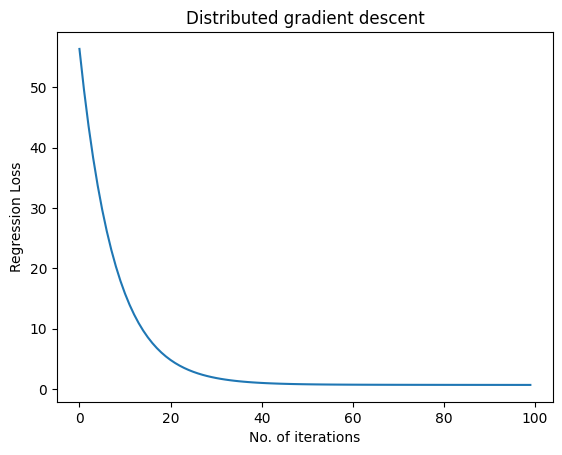

In [14]:
# Pass the relevant variables to the function and get the new values back...
eta = 0.01 # Learning Rate
iterations = 100 # No. of iterations
np.random.seed(123)
w0 = np.random.rand(2) # Pick some random values to start with
wDis, pastLoss = distributed_gradient_descent(uListTrain, w0, iterations, eta)
# Plot the cost function...
plt.title('Distributed gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Regression Loss')
plt.plot(pastLoss)
plt.show()

In [15]:
print(wDis[-1])

[4.28635046 2.46055962]
